# Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X = pd.read_csv('water_potability.csv')


X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [51]:
X = X.copy()

# Forward fill NaN values
X.ffill(inplace=True)

# Replace any remaining NaN values with 0
X.fillna(0, inplace=True)

X.head()

,ph,Potability
0,0.000000,0
1,3.716080,0
2,8.099124,0
3,8.316766,0
4,9.092223,0


In [29]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

X_numeric = X_numeric.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_normalized = normalize(X_scaled)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

X_principal.head()


,P1,P2
0,-0.190935,0.637668
1,-0.349241,-0.615774
2,-0.244284,-0.233354
3,-0.287195,-0.072459
4,-0.047943,-0.077805


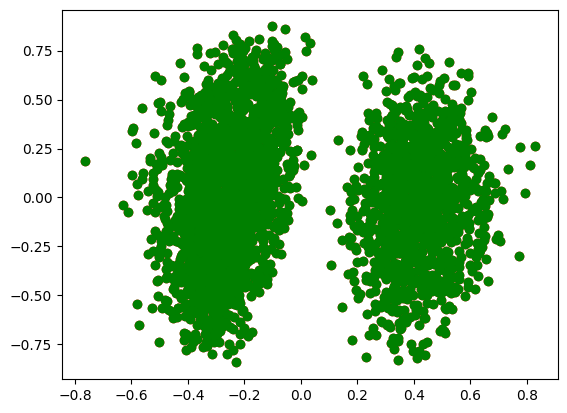

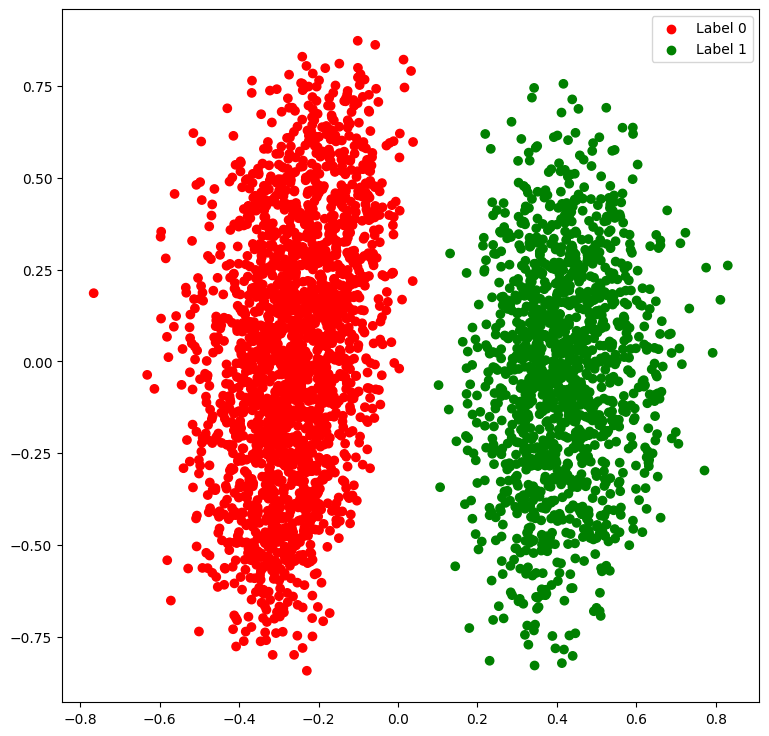

In [56]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
 
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
 
# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
 
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

# Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

**Hypothesis**

The eigenvector centrality analysis of the League of Legends subreddit will reveal that certain users play out a pivotal role in topics on the current meta build for champions, general tournament updates, and bug exploits

Most central nodes: [Redditor(name='Sean888888'), Redditor(name='XtendedImpact'), Redditor(name='povertyregion'), Redditor(name='Super_University_993'), Redditor(name='Joel4518')]


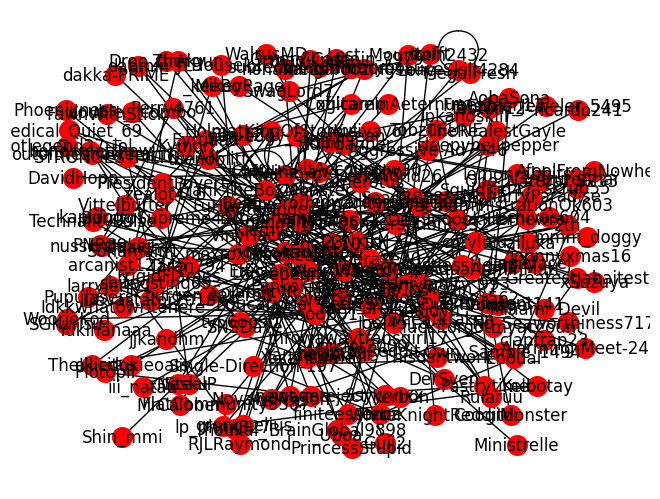

In [8]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

redditApi = praw.Reddit(client_id='9XnxcMI6RVs0F8Pyggcqkg',
                        client_secret='hvVGGyere3MPBum9fDwx9gpwCm2HLw',
                        user_agent='netollams')

subreddit  = redditApi.subreddit('LeagueOfLegends')
commentCount = 10
g = nx.Graph()

def recursive_node_adder(g, comment, parent_author):
    '''Recursively process comments and add them to the graph'''
    
    # Check if we have the node already in our graph
    if comment.author is not None:
        if comment.author not in g.nodes:
            g.add_node(comment.author)
        # Create an edge between this comment author and the parent author
        g.add_edge(comment.author, parent_author)
        # Iterate through the comments
        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue
            # Recursively process this reply
            recursive_node_adder(g, reply, comment.author)

for post in subreddit.hot(limit=20):
    # Check if we have the node already in our graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    post.comment_limit = commentCount
    # Get the top few comments
    for comment in post.comments.list():
        # Skip MoreComment objects, which don't have authors
        if isinstance(comment, praw.models.MoreComments):
            continue
        # Recursively process this reply
        recursive_node_adder(g, comment, post.author)

eigenvector_centrality = nx.eigenvector_centrality(g)
central_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
print("Most central nodes:", central_nodes[:5])  # Print the top 5 central nodes

pos = nx.spring_layout(g, scale=200, iterations=5, k=0.2)
nx.draw(g, pos, node_color='red', width=1, with_labels=True, node_size=200)
plt.show()

**Conclusion**

Analyzing Reddit's League of Legends community has unveiled key contributors who have significantly shaped the subreddit. Leveraging eigenvector centrality, a metric that accounts for both direct and indirect connections within the network, allowed for the identification of these influential users. The flow of information within the community is profoundly influenced by central figures, represented as nodes possessing the highest eigenvector centrality. Users like Sean8888888, XtendedImpact, povertyregion, are the most central nodes interacting wtih the community throught posts and comments. These central individuals play a crucial role in steering the direction and impact of discussions within the League of Legends subreddit.